# O Problema

Você foi contratado(a) para uma consultoria, e seu trabalho envolve analisar os dados de preço do petróleo brent, que pode ser encontrado no site do ipea. Essa base de dados histórica envolve duas colunas: data e preço (em dólares).

Um grande cliente do segmento pediu para que a consultoria desenvolvesse um dashboard interativo e que gere insights relevantes para tomada de decisão. Além disso, solicitaram que fosse desenvolvido um modelo de Machine Learning para fazer o forecasting do preço do petróleo.

Seu objetivo é:
* Criar um dashboard interativo com ferramentas à sua escolha.

* Seu dashboard deve fazer parte de um storytelling que traga insights relevantes sobre a variação do preço do petróleo, como situações geopolíticas, crises econômicas, demanda global por energia e etc. Isso pode te ajudar com seu modelo. É obrigatório que você traga pelo menos 4 insights neste desafio.

* Criar um modelo de Machine Learning que faça a previsão do preço do petróleo diariamente (lembre-se de time series). Esse modelo deve estar contemplado em seu storytelling e deve conter o código que você trabalhou, analisando as performances do modelo.

* Criar um plano para fazer o deploy em produção do modelo, com as ferramentas que são necessárias.

* Faca um MVP do seu modelo em produção utilizando o Streamlit

Lembre-se de que você poderá apresentar o desenvolvimento do seu projeto durante as lives com docentes.

Essa é uma boa oportunidade para discutir sobre as dificuldades encontradas e pegar dicas valiosas com especialistas e colegas de turma.

Não se esqueça que isso é um entregável obrigatório! Se atente para o prazo de entrega até o final da fase.

Vamos pra cima!

In [ ]:
!pip install ipeadatapy
!pip install yfinance

In [ ]:
import ipeadatapy as ipea
import yfinance as yf

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# Extrair os dados - IPEA

In [ ]:
# visualizar a lista de series disponiveis do ipea
series_df = ipea.list_series()

# filtrar na coluna 'NAME' por 'brent' (colocar o case False para não diferencia maiúsculas de minúsculas)
brent_series_df = series_df[series_df['NAME'].str.contains('brent', case=False)]
brent_series_df

,CODE,NAME
4875,EIA366_PBRENT366,Preço - petróleo bruto - Brent (FOB)


In [ ]:
# Codigo Ipea
brent_series_code = ipea.timeseries('EIA366_PBRENT366')
brent_series_code.head(2)

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (US$)
DATE,,,,,,
1986-01-04,EIA366_PBRENT366,1986-01-04T00:00:00-02:00,4,1,1986,NaN
1986-01-05,EIA366_PBRENT366,1986-01-05T00:00:00-02:00,5,1,1986,NaN


In [ ]:
# Selecionar colunas 'DATE' (index) e 'VALUE (US$)'
df_data_brent = brent_series_code[['VALUE (US$)']]

# Renomear colunas
df_data_brent.columns = ['valor']
df_data_brent.index.rename('data', inplace=True)

print(df_data_brent.shape)

(13458, 1)


In [ ]:
df_data_brent.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13458 entries, 1986-01-04 to 2024-06-10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   valor   11188 non-null  float64
dtypes: float64(1)
memory usage: 210.3 KB


## verificar valores nulos

In [ ]:
df_data_brent.isnull().sum()

valor    2270
dtype: int64

Selecionar de 2008 ate a data atual

In [ ]:
df_data_brent_2008 = df_data_brent.loc['2008':]
df_data_brent_2008.isnull().sum()

valor    98
dtype: int64

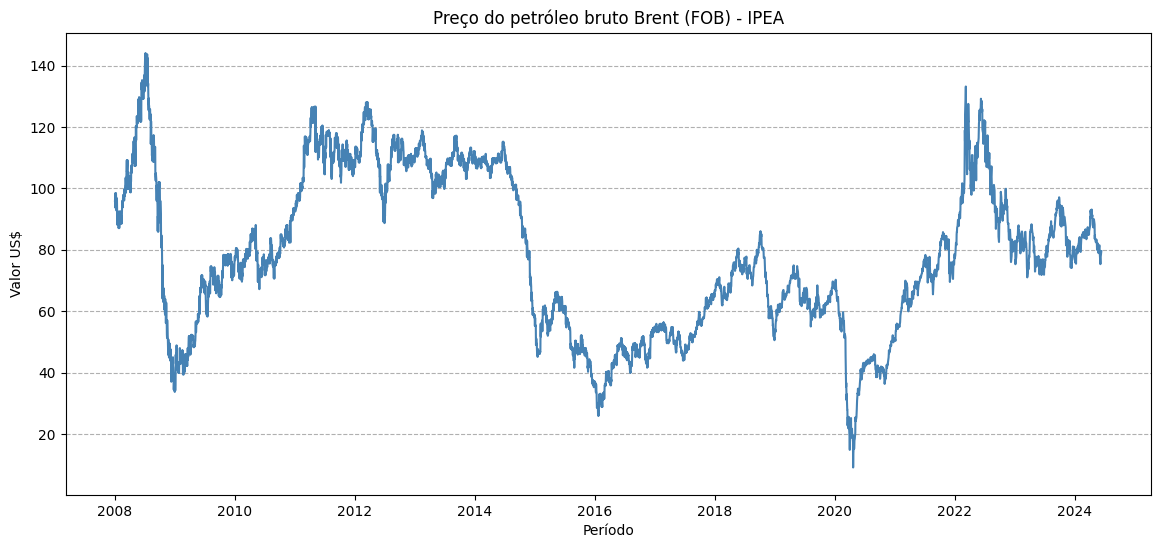

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

cores_rgb_hex = "#4682b4"
plt.figure(figsize=(14,6))

sns.lineplot(data=df_data_brent_2008, x="data", y="valor", color=cores_rgb_hex)

plt.title("Preço do petróleo bruto Brent (FOB) - IPEA")
plt.xlabel("Período")
plt.ylabel("Valor US$")
plt.grid(linestyle="--", axis='y')
plt.ylim(0.25)

plt.show()

In [ ]:
# Grafico de linha
fig1 = px.line(df_data_brent_2008, x=df_data_brent_2008.index, y='valor')
fig1.update_traces(line_color='steelblue')

fig1.update_layout(title='Preço do petróleo bruto Brent (FOB) - IPEA',
                   xaxis_title='Período',
                   yaxis_title='Valor US$')

fig1.show()

# Extrair os dados - Yahoo! Finance's API

In [ ]:
yf = yf.download('BZ=F')
yf.head(2)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-07-30,75.849998,76.529999,75.440002,75.739998,75.739998,2575
2007-07-31,75.699997,77.169998,75.669998,77.050003,77.050003,3513


In [ ]:
# Selecionar colunas 'DATE' (index) e 'Close'
yf_brent_data = yf[['Close']]

# Renomear colunas
yf_brent_data.columns = ['valor']
yf_brent_data.index.rename('data', inplace=True)

print(yf_brent_data.shape)
yf_brent_data.head()

(4190, 1)


,valor
data,
2007-07-30,75.739998
2007-07-31,77.050003
2007-08-01,75.349998
2007-08-02,75.760002
2007-08-03,74.750000


In [ ]:
yf_brent_data.isnull().sum()

valor    0
dtype: int64

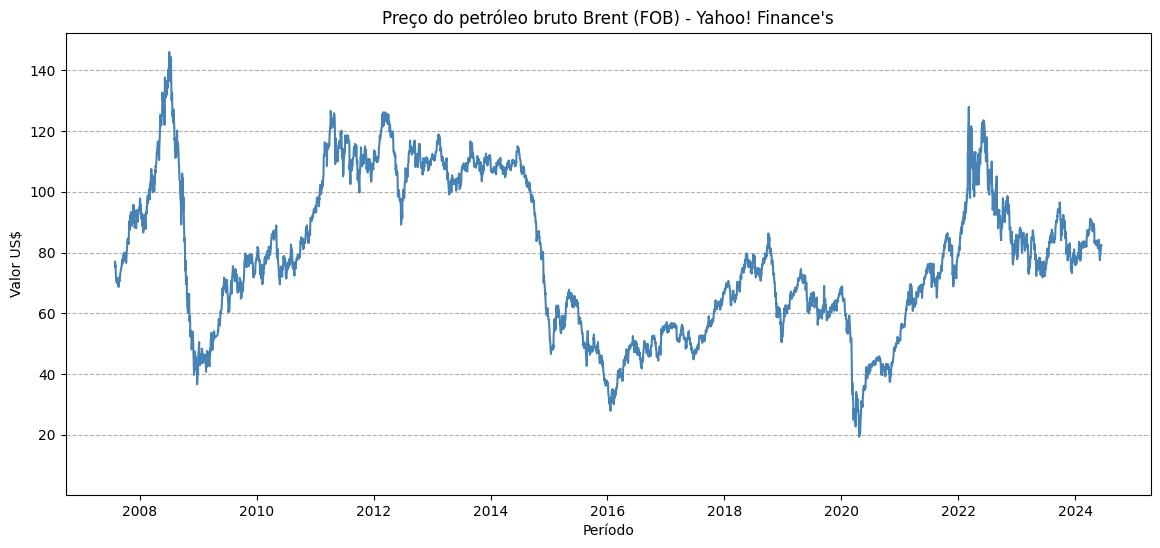

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

cores_rgb_hex = "#4682b4"
plt.figure(figsize=(14,6))

sns.lineplot(data=yf_brent_data, x="data", y="valor", color=cores_rgb_hex)

plt.title("Preço do petróleo bruto Brent (FOB) - Yahoo! Finance's")
plt.xlabel("Período")
plt.ylabel("Valor US$")
plt.grid(linestyle="--", axis='y')
plt.ylim(0.25)

plt.show()

In [53]:
# Grafico de linha para visualizar o data set completo
fig1 = px.line(yf_brent_data, x=yf_brent_data.index, y='valor')

fig1.update_traces(line_color='steelblue')

# layout
fig1.update_layout(title="Preço do petróleo bruto Brent (FOB) - Yahoo! Finance's",
                   xaxis_title='Período',
                   yaxis_title='Valor US$')

fig1.show()

# Pontos historicos que influenciaram o preço do petróleo bruto

In [ ]:
# DataFrame com os pontos de destaque e suas legendas
pontos_destaque = [
    {'data': '2008-09-15', 'destaque': yf_brent_data.loc['2008-09-15', 'valor'],'legenda': 'Falência Lehman Brothers'},
    {'data': '2011-01-25', 'destaque': yf_brent_data.loc['2011-01-25', 'valor'],'legenda': 'Revolução Egípcia'},
    {'data': '2013-01-23', 'destaque': yf_brent_data.loc['2013-01-23', 'valor'],'legenda': 'Embargo contra Irã'},
    {'data': '2015-01-13', 'destaque': yf_brent_data.loc['2015-01-13', 'valor'],'legenda': 'Petróleo de xisto'},
    {'data': '2018-05-08', 'destaque': yf_brent_data.loc['2018-05-08', 'valor'],'legenda': 'Retirada nuclear EUA-Irã'},
    {'data': '2020-03-11', 'destaque': yf_brent_data.loc['2020-03-11', 'valor'],'legenda': 'Covid 19'},
    {'data': '2022-02-24', 'destaque': yf_brent_data.loc['2022-02-24', 'valor'],'legenda': 'Guerra Ucrânia'}
]

df_pontos_destaque = pd.DataFrame(pontos_destaque)

# Criar o gráfico de linha
fig2 = px.line(yf_brent_data, x=yf_brent_data.index, y='valor')
fig2.update_traces(line_color='steelblue')

# Adicionar os pontos de destaque
fig2.add_trace(px.scatter(df_pontos_destaque, x='data', y='destaque').data[0])

# Adicionar anotações para cada ponto de destaque com fundo colorido
for ponto in pontos_destaque:
    fig2.add_annotation(x=ponto['data'], y=ponto['destaque'],
                        yshift=25,
                        text=ponto['legenda'],
                        showarrow=False,
                        font=dict(color='white'),
                        bgcolor='tomato',
                        bordercolor='tomato',
                        borderwidth=1,
                        borderpad=4)

# Personalizar cores e marcadores dos pontos de destaque
fig2.update_traces(marker=dict(color='tomato', size=12, symbol='0'))

# # Personalizar layout do gráfico
fig2.update_layout(title='Pontos historicos que influenciaram o preço do petróleo bruto',
                   xaxis_title='Período',
                   yaxis_title='Valor US$')

fig2.show()

# Média de preço do Petróleo Brent por Ano

In [ ]:
yf_brent_data['year'] = yf_brent_data.index.year

# Cria o box plot usando Plotly Express
fig = px.box(yf_brent_data, x='year', y='valor',
             title='Preço do Petróleo Brent por Ano',
             labels={'year': 'Período', 'valor': 'Preço (US$)'},
             color_discrete_sequence=['steelblue'])

# Personalizar layout do gráfico
fig.update_layout(
    title_font=dict(size=20),
    xaxis=dict(
        title=dict(font=dict(size=14)),
         tickangle=45,
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title=dict(font=dict(size=14)),
        tickfont=dict(size=12),
    ),
)

fig.show()